# **Import Library**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **Memuat Dataset**

In [2]:
# Import data csv dari Gdrive
df = pd.read_csv('/content/sample_data/bank_transactions_data_edited.csv')

# Tampilkan 5 data teratas
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [3]:
# Tampilkan urutan data terbesar
df.tail()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
2532,TX001046,AC00474,230.08,2023-05-01 16:23:40,Debit,Austin,D000045,93.52.44.101,M006,Online,79.0,Retired,124.0,1.0,4466.10,2024-11-04 08:11:47
2533,TX001484,AC00198,561.58,2023-06-23 17:38:26,Debit,Sacramento,D000229,170.154.69.105,M022,Online,65.0,Doctor,23.0,1.0,11748.86,2024-11-04 08:06:32
2534,TX000200,AC00358,493.11,2023-07-31 16:25:26,Debit,Colorado Springs,D000232,35.220.238.127,M022,Branch,53.0,Retired,236.0,1.0,7432.99,2024-11-04 08:08:01
2535,TX000592,AC00057,198.62,2023-05-15 16:19:14,Credit,Tucson,D000378,97.4.209.133,M079,Branch,27.0,Student,84.0,1.0,1196.07,2024-11-04 08:06:38
2536,TX000026,AC00041,7.49,2023-10-20 17:53:13,Credit,Houston,D000671,81.248.235.147,M043,Online,65.0,Retired,276.0,1.0,3634.67,2024-11-04 08:09:44


# **Exploratory Data Analysis**

*   Memahami struktur data


In [4]:
# Meninjau struktur data
df.info()

# Pisahkan numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(exclude=['number'])

# Tampilkan hasil
print("\n\nKolom Numerikal:", numerical_cols.columns.tolist())
print("Kolom Kategorikal:", categorical_cols.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

*   Data Hilang, Duplikat, Outlier

In [5]:
# Cek data hilang & duplikat
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 403
Duplicated values: 21


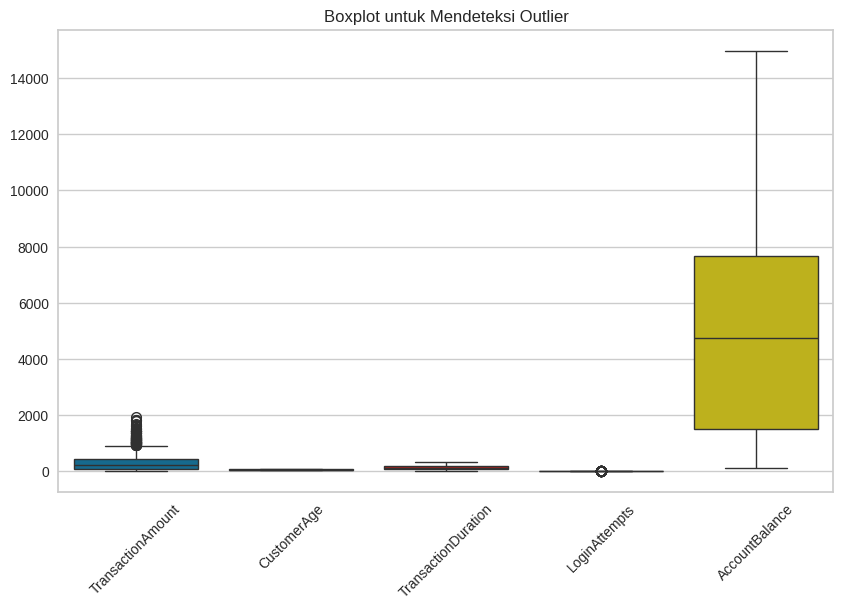

In [6]:
# Cek Outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.show()

*   Analisis Distribusi & Korelasi




Statistik deskriptif

In [7]:
# Statistik deskriptif data numerik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Distribusi Data Numerik

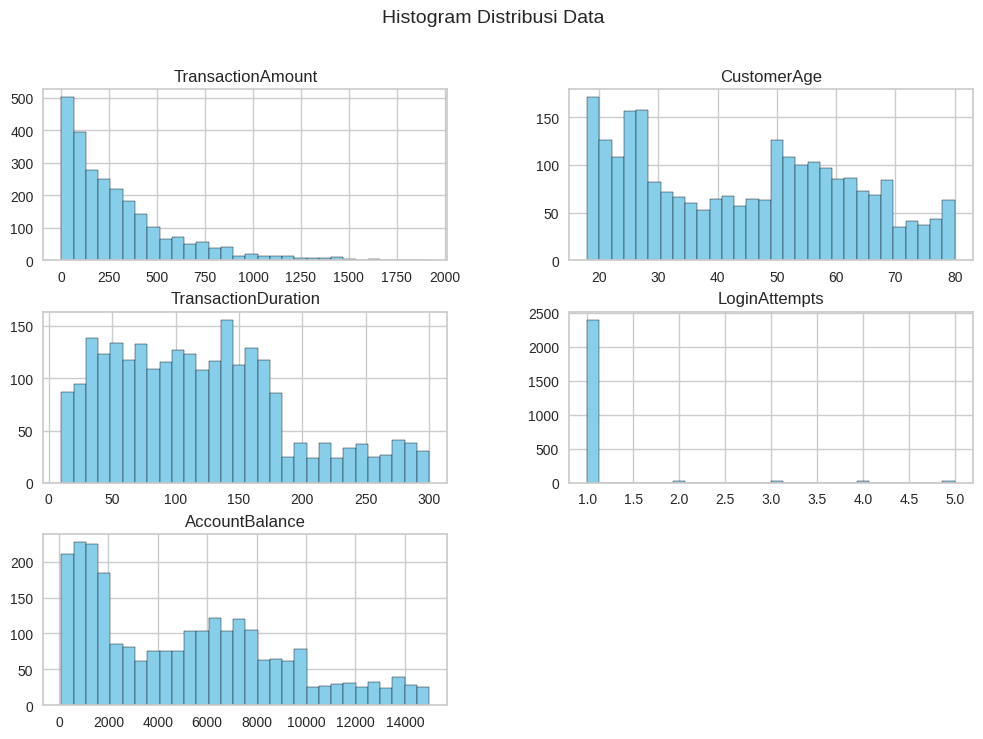

In [8]:
# Histogram Distribusi Data Numerik
numerical_cols.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')

# Tambahkan judul
plt.suptitle("Histogram Distribusi Data", fontsize=14)
plt.show()

**Transaction Amount**

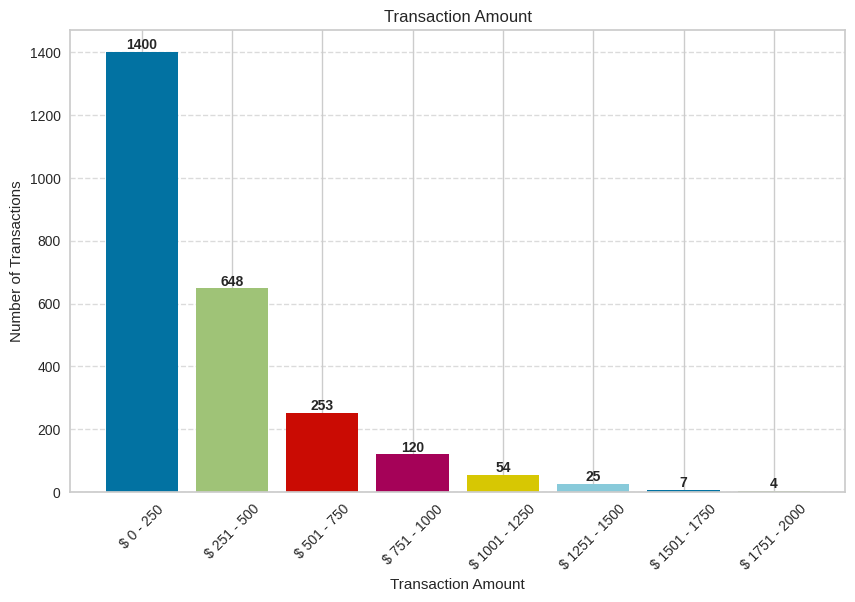

In [9]:
#Definisikan rentang (bins) untuk TransactionAmount
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
labels = ["$ 0 - 250", "$ 251 - 500", "$ 501 - 750", "$ 751 - 1000", "$ 1001 - 1250", "$ 1251 - 1500", "$ 1501 - 1750", "$ 1751 - 2000"]

# Kategorisasi data berdasarkan bins
amount_range = pd.cut(df["TransactionAmount"], bins=bins, labels=labels, right=True)
amount_counts = amount_range.value_counts().reindex(labels, fill_value=0)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(amount_counts.index, amount_counts.values, color=sns.color_palette())

# Tambahkan angka di atas setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight="bold")

# Format plot
plt.title("Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

**Customer Age**

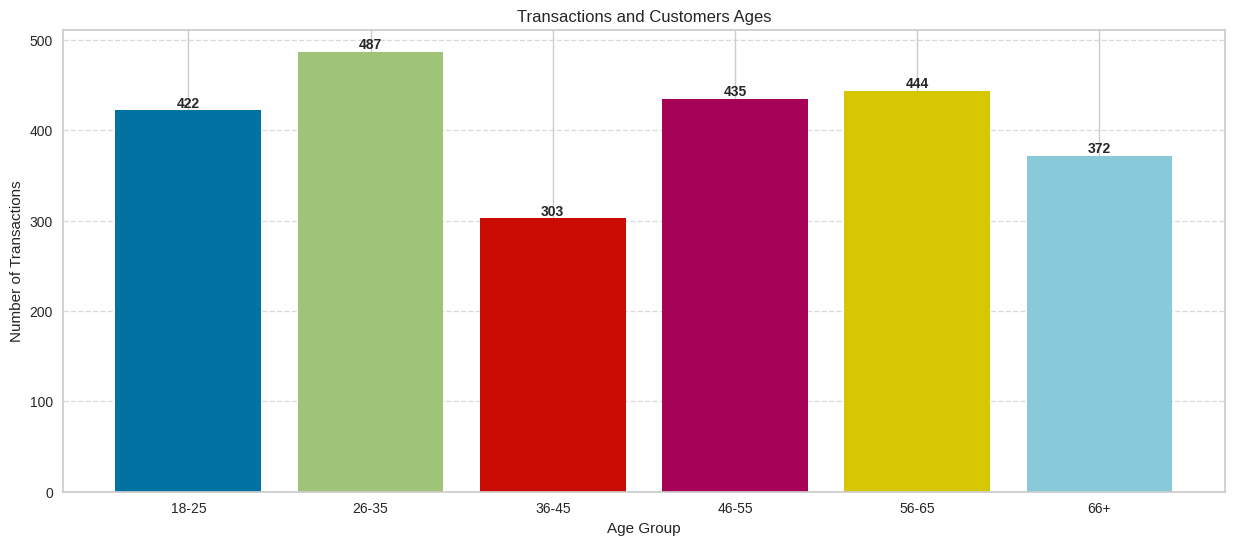

In [10]:
# Definisikan rentang usia (bins)
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66+"]

# Kategorisasi data berdasarkan bins
age_groups = pd.cut(df["CustomerAge"], bins=bins, labels=labels, right=True)
age_counts = age_groups.value_counts().reindex(labels, fill_value=0)

# Plot bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(age_counts.index, age_counts.values, color=sns.color_palette())

# Tambahkan angka di atas setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight="bold")

# Format plot
plt.title("Transactions and Customers Ages")
plt.xlabel("Age Group")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

**Transaction Login Attempts**

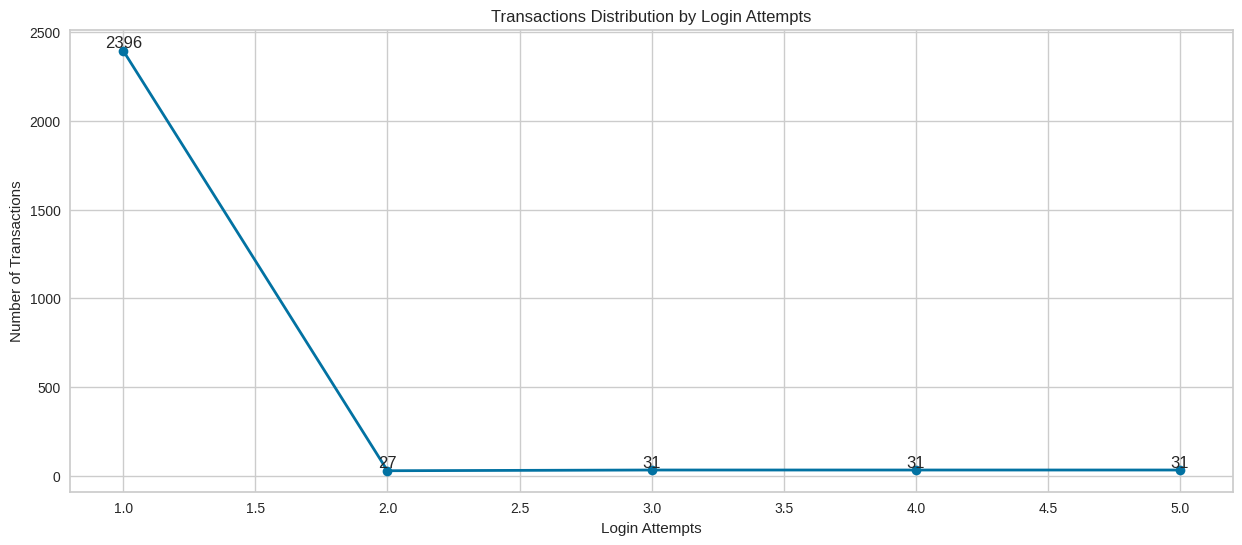

In [11]:
# Hitung jumlah transaksi untuk setiap kategori LoginAttempts
login_attempts = df["LoginAttempts"].value_counts().sort_index()

# Plot data dalam bentuk line chart
plt.figure(figsize=(15, 6))
plt.plot(login_attempts.index, login_attempts.values, marker='o', color='b', linestyle='-', linewidth=2)

# Tambahkan angka di atas setiap titik
for i, value in enumerate(login_attempts.values):
    plt.text(login_attempts.index[i], value, str(value), ha='center', va='bottom')

# Format plot
plt.xlabel("Login Attempts")
plt.ylabel("Number of Transactions")
plt.title("Transactions Distribution by Login Attempts")
plt.grid(True)

# Tampilkan plot
plt.show()

**Account Balance**

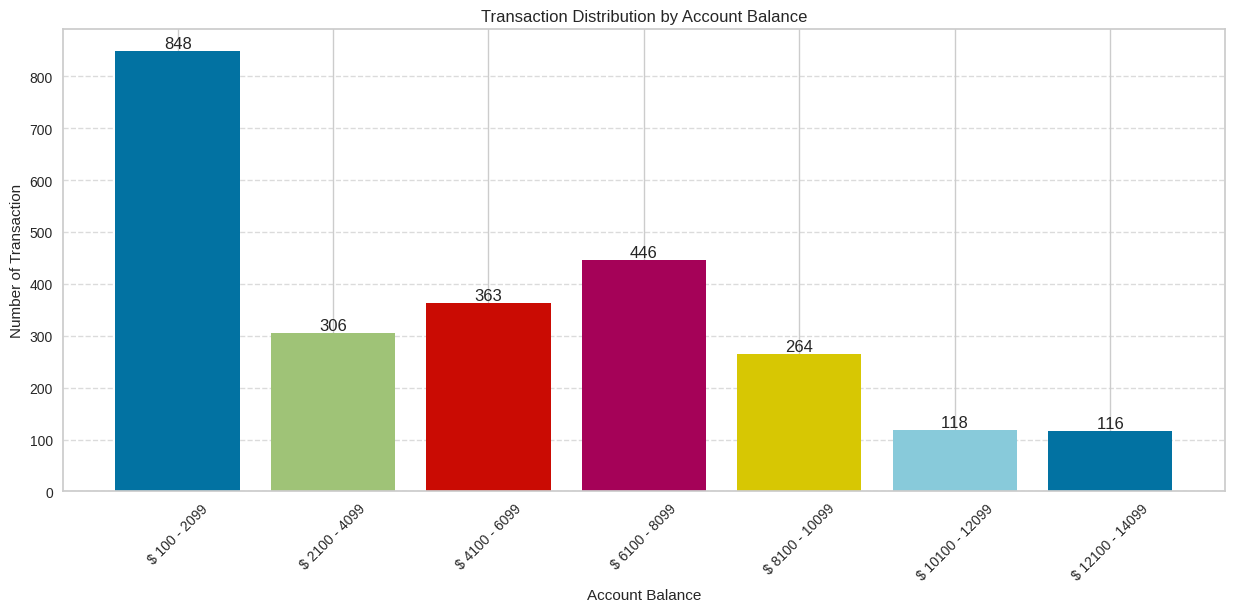

In [12]:
# Definisikan rentang saldo akun (AccountBalance)
bins = list(range(100, 15500, 2000))  # Membuat rentang dari 100 hingga 15000 dengan interval 2000
labels = [f"$ {bins[i]} - {bins[i+1]-1}" for i in range(len(bins)-1)]

# Mengelompokkan transaksi berdasarkan saldo akun
account_balance = pd.cut(df["AccountBalance"], bins=bins, labels=labels, right=False)
balance_counts = account_balance.value_counts().reindex(labels, fill_value=0)

# Plot data dalam bentuk bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(balance_counts.index, balance_counts.values, color=sns.color_palette())

# Tambahkan angka di atas setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# Format plot
plt.title("Transaction Distribution by Account Balance")
plt.xlabel("Account Balance")
plt.ylabel("Number of Transaction")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

**Transaction Duration**

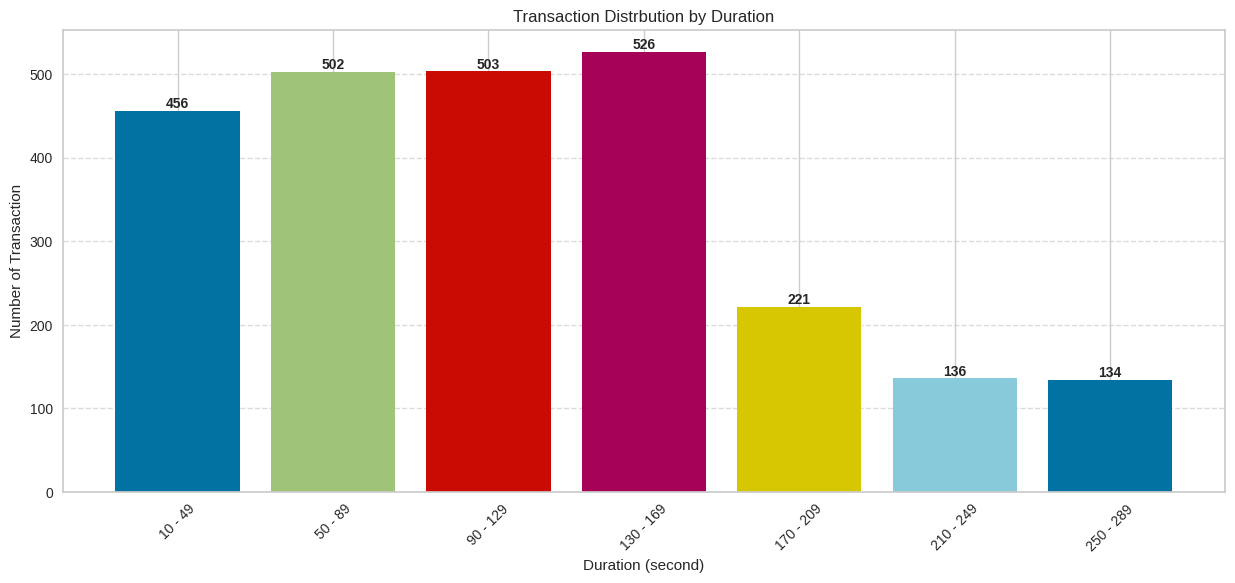

In [13]:
# Definisikan rentang durasi transaksi
bins = list(range(10, 310, 40))  # Membuat rentang dari 10 hingga 300 dengan interval 40
labels = [f"{bins[i]} - {bins[i+1]-1}" for i in range(len(bins)-1)]

# Mengelompokkan transaksi berdasarkan durasi
transaction_duration = pd.cut(df["TransactionDuration"], bins=bins, labels=labels, right=False)
duration_counts = transaction_duration.value_counts().reindex(labels, fill_value=0)

# Plot data dalam bentuk bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(duration_counts.index, duration_counts.values, color=sns.color_palette())

# Tambahkan angka di atas setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=10, fontweight="bold")

# Format plot
plt.title("Transaction Distrbution by Duration")
plt.xlabel("Duration (second)")
plt.ylabel("Number of Transaction")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

**Metrik Korelasi**

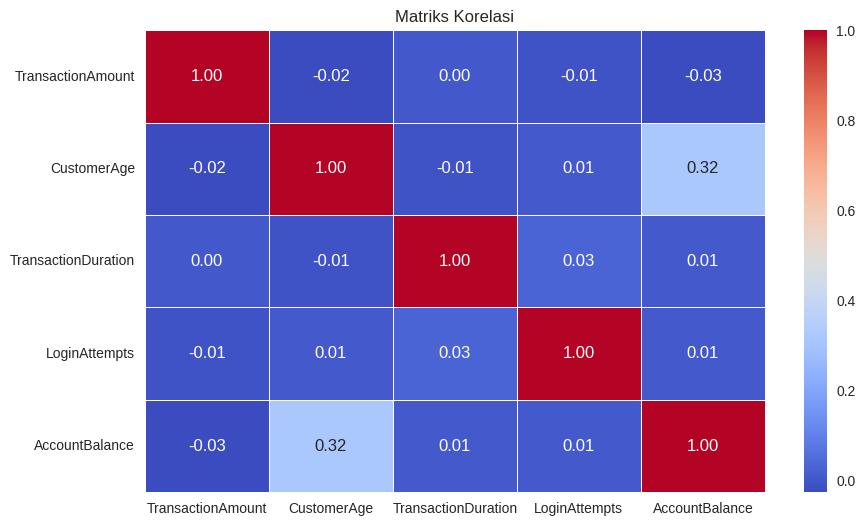

In [14]:
# Hitung matriks korelasi
corr_matrix = numerical_cols.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

Distribusi Data Kategorikal

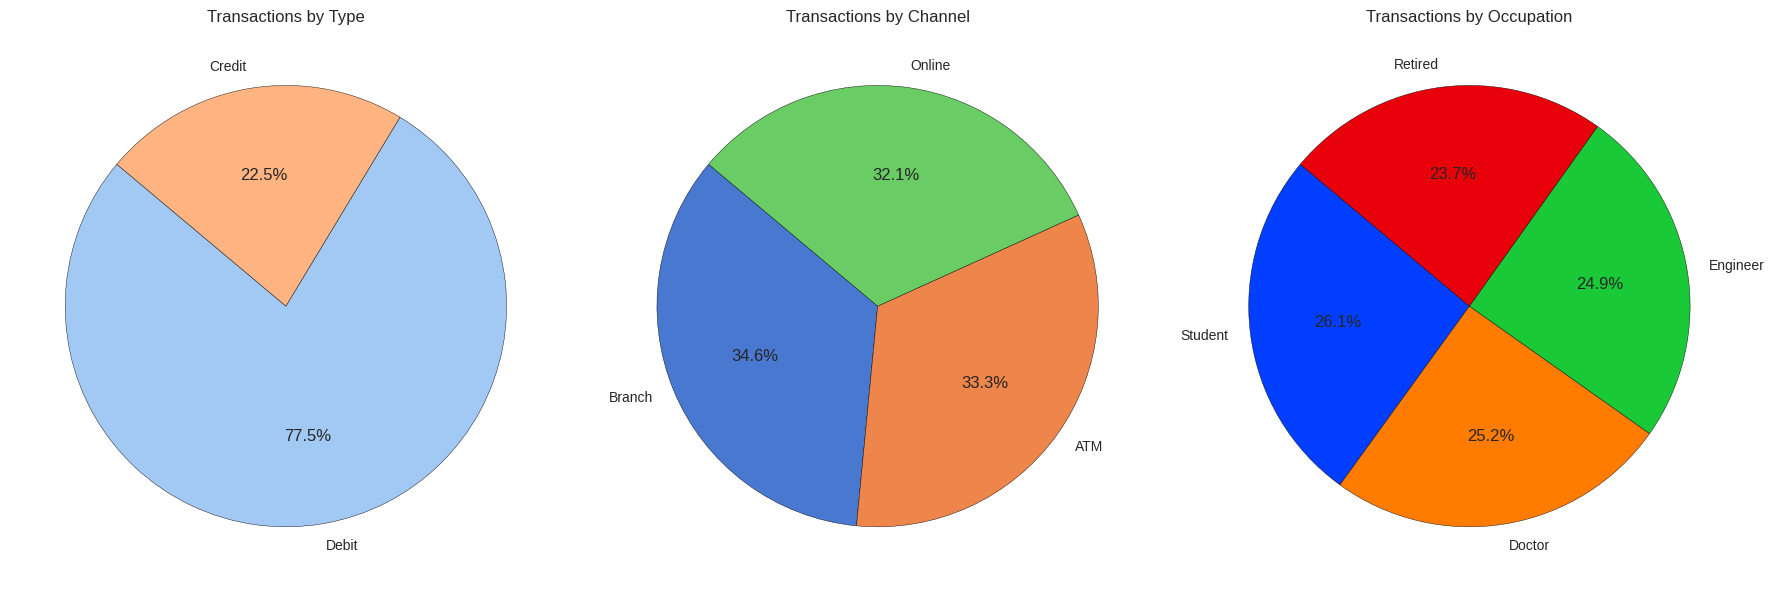

In [15]:
# Daftar kategori yang akan ditampilkan dalam pie chart
categories = ["TransactionType", "Channel", "CustomerOccupation"]
titles = ["Transactions by Type", "Transactions by Channel", "Transactions by Occupation"]
colors = ["pastel", "muted", "bright"]  # Warna untuk setiap pie chart

# Buat figure dengan 1 baris 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop untuk membuat pie chart secara otomatis
for i, category in enumerate(categories):
    data = df[category].value_counts()
    axes[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        colors=sns.color_palette(colors[i], len(data)),
        startangle=140,
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(titles[i])

# Tampilkan layout yang rapi
plt.tight_layout()
plt.show()

**Transaction Date**

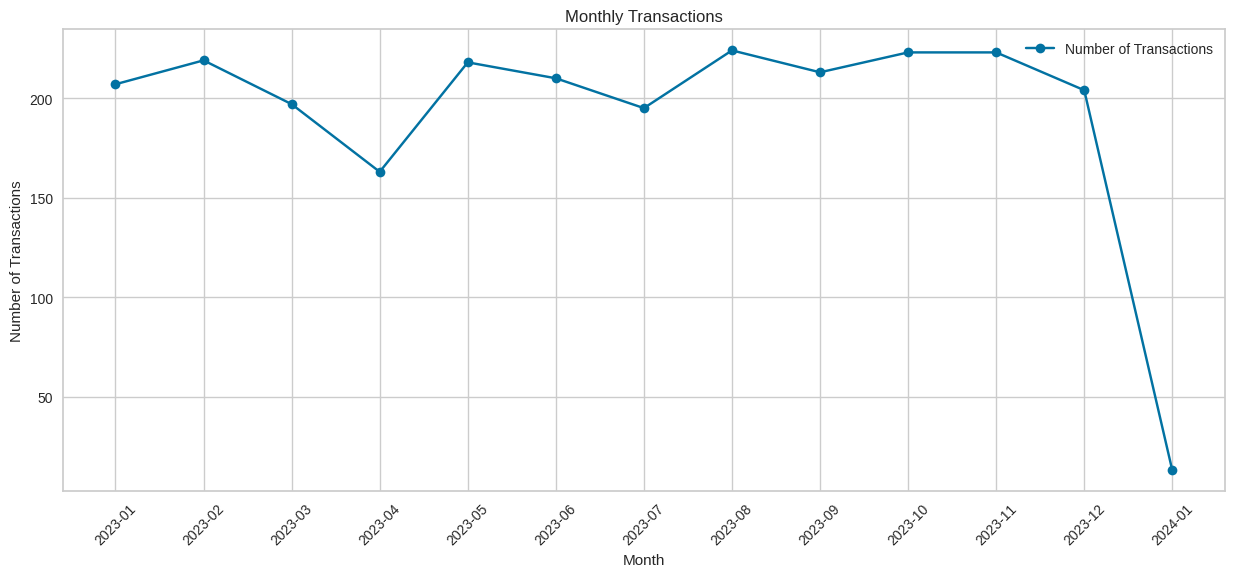

In [16]:
# Pastikan kolom tanggal dalam format datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Ambil bulan dari kolom tanggal
monthly_trends = df.groupby(df['TransactionDate'].dt.strftime('%Y-%m')).size()

# Plot tren transaksi bulanan
plt.figure(figsize=(15, 6))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', linestyle='-', color='b', label="Number of Transactions")

# Format plot
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Monthly Transactions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

**Transaction Location**

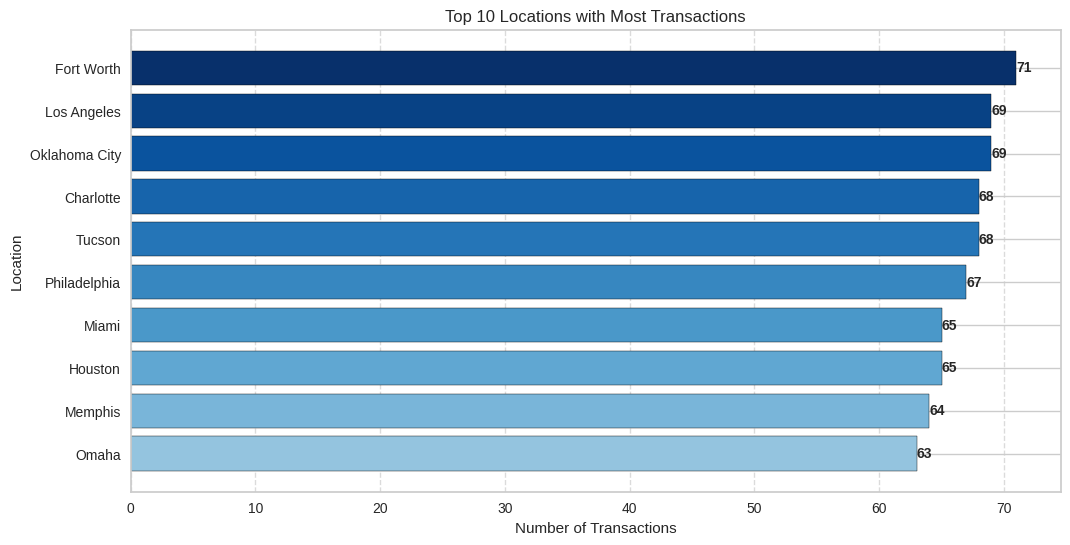

In [17]:
# Hitung jumlah transaksi untuk setiap lokasi, lalu ambil top 10
transactions_locations = df["Location"].value_counts().nlargest(10)

# Buat gradasi warna dari biru muda ke biru tua
colors = plt.cm.Blues(np.linspace(1, 0.4, len(transactions_locations)))

# Plot data dalam bentuk horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(transactions_locations.index, transactions_locations.values, color=colors, edgecolor="black")

# Tambahkan angka di ujung setiap batang
for bar in bars:
    plt.text(
        bar.get_width(),  # Posisi X (ujung batang)
        bar.get_y() + bar.get_height() / 2,  # Posisi Y (tengah batang)
        str(int(bar.get_width())),  # Teks angka
        ha="left",  # Horizontal alignment
        va="center",  # Vertical alignment
        fontsize=10,
        fontweight="bold"
    )

# Format plot
plt.xlabel("Number of Transactions")
plt.ylabel("Location")
plt.title("Top 10 Locations with Most Transactions")
plt.gca().invert_yaxis()  # Membalik sumbu Y agar ranking tertinggi di atas
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

# **Data Preprocessing**

**Menangani Outlier**

In [18]:
# Hitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df[numerical_cols.columns].quantile(0.25)
Q3 = df[numerical_cols.columns].quantile(0.75)

# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Deteksi outlier
outliers = ((df[numerical_cols.columns] < lower_bound) | (df[numerical_cols.columns] > upper_bound)).sum()

print("\nJumlah outlier per kolom berdasarkan IQR:\n", outliers)


Jumlah outlier per kolom berdasarkan IQR:
 TransactionAmount      113
CustomerAge              0
TransactionDuration      0
LoginAttempts          120
AccountBalance           0
dtype: int64


In [19]:
# Filter data dengan kondisi outlier berdasarkan IQR
df_clean = df[~((df[numerical_cols.columns] < lower_bound) | (df[numerical_cols.columns] > upper_bound)).any(axis=1)]

# Cek jumlah data sebelum dan sesudah penghapusan outlier
print(f"\nJumlah data sebelum menghapus outlier: {df.shape[0]}")
print(f"Jumlah data setelah menghapus outlier: {df_clean.shape[0]}")

df_real = df_clean


Jumlah data sebelum menghapus outlier: 2537
Jumlah data setelah menghapus outlier: 2309


Menghapus fitur yang tidak penting dan berkorelasi

In [20]:
df_clean = df_clean.drop(columns=['TransactionID', 'AccountID', 'IP Address', 'DeviceID', 'PreviousTransactionDate', 'TransactionDate', 'MerchantID', 'LoginAttempts', 'Location', 'Channel'])

Encoding data kategorikal

In [21]:
label_cols = ['TransactionType', 'CustomerOccupation']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

Standarisasi fitur

In [22]:
numerical_cols = df_clean.select_dtypes(include=['number'])

# Standardization (Z-score)
standard_scaler = StandardScaler()
df_clean[numerical_cols.columns] = standard_scaler.fit_transform(numerical_cols)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2309 entries, 0 to 2536
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2286 non-null   float64
 1   TransactionType      2309 non-null   float64
 2   CustomerAge          2292 non-null   float64
 3   CustomerOccupation   2309 non-null   float64
 4   TransactionDuration  2287 non-null   float64
 5   AccountBalance       2285 non-null   float64
dtypes: float64(6)
memory usage: 126.3 KB


In [23]:
# Mengambil kolom 'TransactionType' dan 'TransactionType' dari dataset dan menyimpannya dalam array X
X = df.iloc[:, [3, 4]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['TransactionType', 'TransactionAmount']))
# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['TransactionType', 'TransactionAmount']))

         TransactionType TransactionAmount
0    2023-04-11 16:29:14             Debit
1    2023-06-27 16:44:19             Debit
2    2023-07-10 18:16:08             Debit
3    2023-05-05 16:32:11             Debit
4    2023-10-16 17:51:24            Credit
...                  ...               ...
2532 2023-05-01 16:23:40             Debit
2533 2023-06-23 17:38:26             Debit
2534 2023-07-31 16:25:26             Debit
2535 2023-05-15 16:19:14            Credit
2536 2023-10-20 17:53:13            Credit

[2537 rows x 2 columns]
         TransactionType TransactionAmount
0    2023-04-11 16:29:14             Debit
1    2023-06-27 16:44:19             Debit
2    2023-07-10 18:16:08             Debit
3    2023-05-05 16:32:11             Debit
4    2023-10-16 17:51:24            Credit
...                  ...               ...
2532 2023-05-01 16:23:40             Debit
2533 2023-06-23 17:38:26             Debit
2534 2023-07-31 16:25:26             Debit
2535 2023-05-15 16:19:14     

# **Membangun Model Cluster**


1.   Membangun model cluster dengan K-Means


In [24]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Drop rows with any remaining NaN values in df_clean before fitting
df_clean = df_clean.dropna()

kmeans.fit(df_clean)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [25]:
# Pastikan hanya mengambil fitur numerik
X_features = df_clean.select_dtypes(include=['int32', 'float64'])
labels = kmeans.fit_predict(X_features)
df_clean['Cluster'] = labels

def analyze_clusters(X_original, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")

    # Ubah X_original ke DataFrame jika masih berbentuk array
    if isinstance(X_original, pd.DataFrame):
        X_original_df = X_original.copy()
    else:
        X_original_df = pd.DataFrame(X_original, columns=[f"Feature{i+1}" for i in range(X_original.shape[1])])

    # Ubah nama kolom menjadi 'Cluster' agar sesuai dengan penggunaan di bawah
    X_original_df['Cluster'] = labels

    for cluster_id in range(k):
        print(f"\nCluster {cluster_id + 1}:")

        # Data untuk cluster saat ini
        cluster_original_data = X_original_df[X_original_df['Cluster'] == cluster_id]

        print("  - Original Features:")
        for feature in X_original_df.columns[:-1]:  # Exclude 'Cluster' column
            mean_value = cluster_original_data[feature].mean()
            print(f"    {feature}: {mean_value:.2f}")

# Contoh pemanggilan fungsi:
analyze_clusters(X_features, labels, 3)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
  - Original Features:
    TransactionAmount: 0.07
    TransactionType: 0.03
    CustomerAge: -1.18
    CustomerOccupation: 1.27
    TransactionDuration: 0.03
    AccountBalance: -0.92

Cluster 2:
  - Original Features:
    TransactionAmount: 0.01
    TransactionType: -1.80
    CustomerAge: 0.48
    CustomerOccupation: -0.41
    TransactionDuration: -0.05
    AccountBalance: 0.35

Cluster 3:
  - Original Features:
    TransactionAmount: -0.03
    TransactionType: 0.52
    CustomerAge: 0.43
    CustomerOccupation: -0.48
    TransactionDuration: 0.00
    AccountBalance: 0.33


In [26]:
# Import joblib
import joblib

# Simpan model_clustering.h5
kmeans.cluster_centers_
joblib.dump(kmeans, 'model_clustering.h5')

['model_clustering.h5']

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


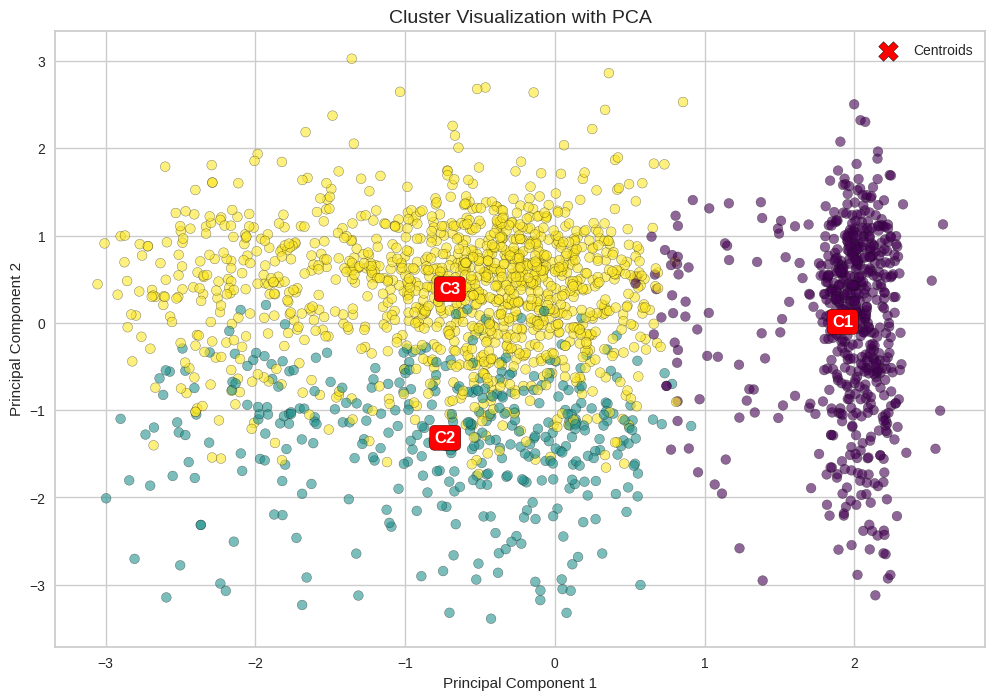

In [27]:
# Menghitung jarak setiap titik ke centroid klasternya
centroids = kmeans.cluster_centers_
df_clean['DistanceToCentroid'] = np.linalg.norm(X_features.to_numpy() - centroids[kmeans.labels_], axis=1)

# Reduksi Dimensi Menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# Proyeksikan centroids ke ruang PCA
centroids_pca = pca.transform(centroids)

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))

# Plot semua data dengan warna sesuai cluster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clean['Cluster'], cmap='viridis', alpha=0.6, edgecolors='k')

# Plot centroid cluster
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', edgecolors='black', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'C{i+1}', fontsize=12, fontweight='bold', ha='center', va='center', color='white',bbox=dict(facecolor='red', edgecolor='black', boxstyle='round,pad=0.3'))

# Judul dan label
plt.title("Cluster Visualization with PCA", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


2.   Evaluasi Model Clustering



**Metode Elbow**

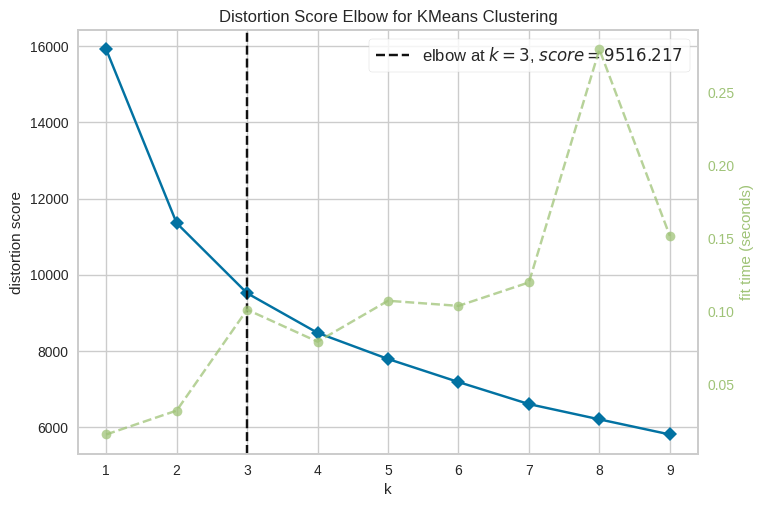

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Inisialisasi model KMeans
kmeans = KMeans(random_state=42, n_init=10)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_clean)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

**Silhouette Score**

In [29]:
# Silhouette Score untuk menentukan jumlah cluster optimal
silhouette_scores = []
cluster_range = range(2, 6)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_features)
    score = silhouette_score(X_features, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score:.4f}")

Jumlah Cluster: 2, Silhouette Score: 0.2527
Jumlah Cluster: 3, Silhouette Score: 0.2578
Jumlah Cluster: 4, Silhouette Score: 0.2236
Jumlah Cluster: 5, Silhouette Score: 0.2217


# **Penilaian**

**Feature Selection**

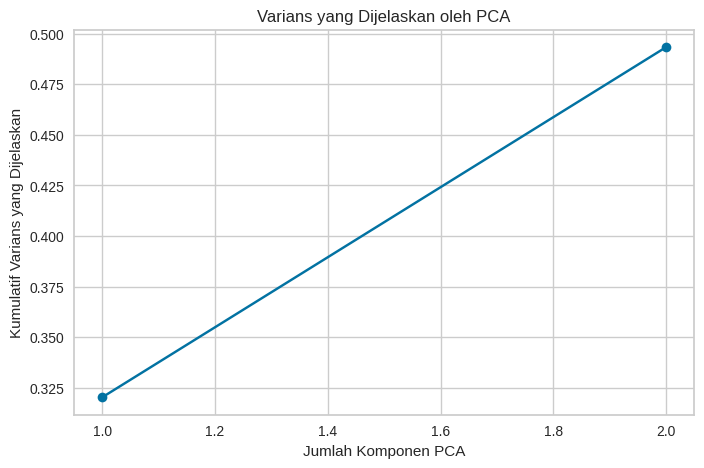

In [30]:
# Reduksi dimensi ke 2 untuk visualisasi
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_features)

# Visualisasi varians yang dijelaskan oleh PCA
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_2d.explained_variance_ratio_) + 1), pca_2d.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Kumulatif Varians yang Dijelaskan")
plt.title("Varians yang Dijelaskan oleh PCA")
plt.show()

In [31]:
# Lakukan clustering dengan data hasil PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca_2d)

# Evaluasi dengan Silhouette Score
silhouette_pca = silhouette_score(X_pca_2d, labels_pca)
print(f"Silhouette Score awal: {silhouette_scores[2]:.4f}")
print(f"Silhouette Score akhir: {silhouette_pca:.4f}")

Silhouette Score awal: 0.2236
Silhouette Score akhir: 0.4197


In [32]:
# Analisis setiap cluster setelah PCA
def analyze_clusters_pca(X_pca, labels, k):
    print("Analisis Karakteristik Setiap Cluster (dalam ruang PCA):")

    # Ubah X ke DataFrame untuk analisis yang lebih mudah
    X_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
    X_df['Cluster'] = labels

    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X_df[X_df['Cluster'] == cluster_id]

        print(f"\nCluster {cluster_id + 1}:")
        for feature in X_df.columns[:-1]:
            mean_value = cluster_data[feature].mean()
            print(f"Rata-rata {feature}: {mean_value:.2f}")

# Panggil fungsi analisis cluster
analyze_clusters_pca(X_pca_2d, labels_pca, 3)

Analisis Karakteristik Setiap Cluster (dalam ruang PCA):

Cluster 1:
Rata-rata PC1: -0.70
Rata-rata PC2: -1.13

Cluster 2:
Rata-rata PC1: -0.73
Rata-rata PC2: 0.64

Cluster 3:
Rata-rata PC1: 1.89
Rata-rata PC2: 0.03


**Visualisasi Hasil Clustering**

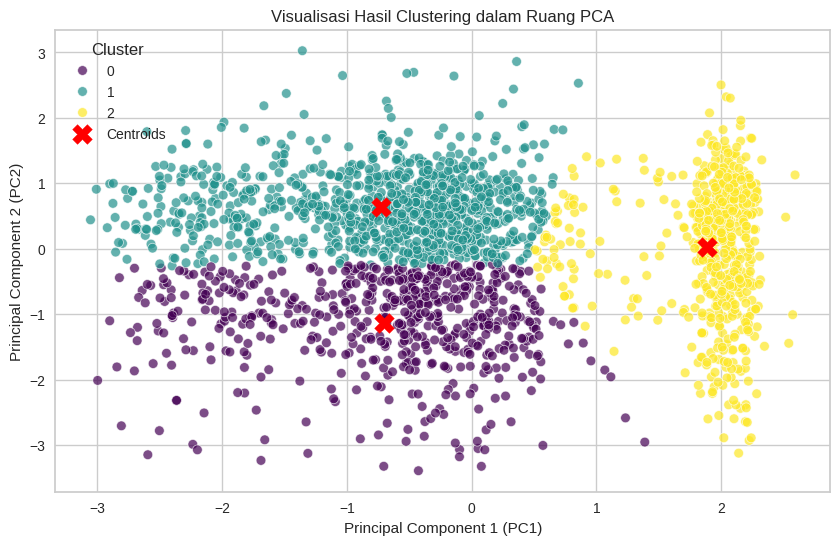

In [33]:
# Menambahkan label cluster ke dataframe hasil PCA
df_pca = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
df_pca["Cluster"] = labels_pca

# Visualisasi hasil clustering dalam ruang PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_pca["PC1"],
    y=df_pca["PC2"],
    hue=df_pca["Cluster"],
    palette="viridis",
    alpha=0.7
)

# Menandai centroids cluster dalam ruang PCA
centroids_pca = kmeans_pca.cluster_centers_
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c="red", marker="X", s=200, label="Centroids")

# Menampilkan plot
plt.title("Visualisasi Hasil Clustering dalam Ruang PCA")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Cluster")
plt.show()

In [34]:
# Simpan cluster PCA ke file dengan joblib.dump()
joblib.dump(kmeans_pca, 'model_clustering_pca.h5')

['model_clustering_pca.h5']

**Analisis dan Interpretasi Hasil Clustering**


*   Interpretasi Target, menambahkan hasil label cluster ke Dataframe


Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame

In [35]:
# Tambahkan hasil label cluster ke DataFrame yang telah dinormalisasi
# Make sure df_clean is the DataFrame used for clustering (after outlier removal and dropping columns)
# The clustering was done on X_features which was derived from df_clean.
# labels_pca has the same number of rows as X_features and df_clean.
# So, we assign the labels to df_clean.
df_clean['Cluster'] = labels_pca

# Check the info of df_clean after adding the cluster column
# This helps verify that the column was added successfully and check the shape
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 0 to 2536
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2224 non-null   float64
 1   TransactionType      2224 non-null   float64
 2   CustomerAge          2224 non-null   float64
 3   CustomerOccupation   2224 non-null   float64
 4   TransactionDuration  2224 non-null   float64
 5   AccountBalance       2224 non-null   float64
 6   Cluster              2224 non-null   int32  
 7   DistanceToCentroid   2224 non-null   float64
dtypes: float64(7), int32(1)
memory usage: 147.7 KB


In [36]:
# Pastikan df_real adalah DataFrame setelah menghapus outlier (df_clean sebelum dropping features)
# dan df_clean adalah DataFrame yang digunakan untuk clustering (setelah preprocessing).
# labels_pca memiliki jumlah baris yang sama dengan df_clean (setelah preprocessing).

# Buat Series dari labels_pca dengan index yang sama dengan df_clean yang digunakan untuk clustering
# Ini memastikan label kluster sesuai dengan baris yang tepat di df_real
cluster_labels_series = pd.Series(labels_pca, index=df_clean.index, name='Cluster')

# Gabungkan Series label kluster ke df_real menggunakan indeks
# Ini akan menambahkan kolom 'Cluster' ke df_real hanya untuk baris yang ada di df_clean (setelah outlier removal)
# Jika 'Cluster' sudah ada di df_real, join akan menambahkan suffix.
# Untuk menghindari konflik, pastikan 'Cluster' belum ada atau timpa kolom yang sudah ada
if 'Cluster' in df_real.columns:
    print("Kolom 'Cluster' sudah ada di df_real. Akan ditimpa.")
    df_real = df_real.drop(columns=['Cluster'])

df_real = df_real.join(cluster_labels_series)

# Pastikan bahwa baris di df_real yang tidak ada di df_clean (yaitu, outlier yang dihapus)
# memiliki nilai NaN atau indikator lain di kolom 'Cluster'.
# Jika Anda hanya ingin menganalisis data yang tersisa setelah outlier removal,
# Anda bisa bekerja langsung dengan df_real setelah join atau dengan df_clean (after adding cluster labels).
# Berdasarkan kode selanjutnya (groupby df_real['Cluster']), diasumsikan analisis
# dilakukan pada data setelah outlier removal dan joining labels.

# Ringkasan statistik per-Cluster
# Sekarang df_real should have the correct 'Cluster' column from clustering on the cleaned data.
print("Ringkasan statistik per-Cluster:")

# Filter df_real to include only rows that have a cluster label (i.e., were not outliers removed)
# This ensures the aggregation is done only on the data used for clustering.
# Use df_real directly, which now has the cluster labels joined based on index.
df_real_clustered = df_real.dropna(subset=['Cluster']).copy()

# Convert cluster column to integer type if needed
df_real_clustered['Cluster'] = df_real_clustered['Cluster'].astype(int)


print(df_real_clustered.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'min', 'max', 'std'],
    'AccountBalance': ['mean', 'median', 'min', 'max', 'std'],
    'TransactionDuration':  ['mean', 'median', 'min', 'max', 'std'],
    # Gunakan df_real_clustered untuk mengakses kolom kategoris asli
    # df_real_clustered contains the original columns from df_real before dropping
    # features for clustering, as the join was done on df_real.
    'TransactionType': lambda x: x.value_counts().to_dict(),
    'CustomerAge': lambda x: x.value_counts().to_dict(),
    'CustomerOccupation': lambda x: x.value_counts().to_dict(),
}))

Ringkasan statistik per-Cluster:
        TransactionAmount                                    AccountBalance  \
                     mean   median   min     max         std           mean   
Cluster                                                                       
0              391.807174  374.610  2.03  903.19  254.559964    6580.031404   
1              171.037081  137.590  0.32  655.15  134.977339    6441.569148   
2              266.455735  207.765  0.26  881.32  222.144082    1454.615343   

                                                TransactionDuration         \
          median     min       max          std                mean median   
Cluster                                                                      
0        6364.14  184.72  14977.99  3643.260145           97.940778   90.0   
1        6309.80  120.89  14942.78  3555.633028          129.591577  124.0   
2        1065.12  101.25   9716.68  1633.197986          120.550654  109.0   

                       

In [37]:
# Simpan hasilnya ke dalam file CSV
df_real.to_csv("best_model_clustering.csv", index=False)

*   Analisis Karakteristik Cluster dari model K-Means

**Cluster 1 :** Nasabah dengan kriteria transaksi menggunakan Kredit terbanyak dan saldo tertinggi.


*   Rata-rata Transaction Amount : 391.80
*   Rata-rata Customer Age : 53.0
*   Rata-rata Customer Occupation : Retired
*   Rata-rata Transaction Duration : 97.94
*   Rata-rata Transaction Type : Kredit
*   Rata-rata Account Balance : 6580

**Analisis :** Nasabah dalam Cluster  1 memiliki jumlah transaksi yang tertinggi dengan durasi transakasi pendek. Saldo mereka juga cukup stabil dan diatas rata-rata. Mereka tergolong aktif sebagai nasabah yang bertransaki kredit, dan nasabah di cluster ini terbanyak diminati oleh Pensiunan dengan rate usia 53-60

**Cluster 2 :** Nasabah dengan kriteria transaksi menggunakan Debit terbanyak dan saldo tertinggi ke-2 setelah cluster 1.

*   Rata-rata Transaction Amount : 171.04
*   Rata-rata Customer Age : 57.0
*   Rata-rata Customer Occupation : Doctor
*   Rata-rata Transaction Duration : 129.60
*   Rata-rata Transaction Type : Debit
*   Rata-rata Account Balance : 6441

**Analisis :** Nasabah dalam Cluster 2 memiliki jumlah transaksi tertinggi ke-2 setelah Cluster 1 dengan durasi transaksi panjang. Saldo mereka juga cukup stabil dan diatas rata-rata. Mereka tergolong aktif sebagai nasabah yang bertransaksi Debit, dan nasabah di cluster ini terbanyak diminati oleh Dokter dengan rate usia 57-63

**Cluster 3 :** Nasabah dengan kriteria transaksi menggunakan Debit dan saldo tidak stabil dibawah rata-rata diantara Cluster 1 dan 2.

*   Rata-rata Transaction Amount : 266.50
*   Rata-rata Customer Age : 25.0
*   Rata-rata Customer Occupation : Student
*   Rata-rata Transaction Duration : 120.55
*   Rata-rata Transaction Type : Debit
*   Rata-rata Account Balance : 1454

**Analisis :** Nasabah dalam Cluster 3 memiliki jumlah transaksi terendah dengan durasi transaksi yang cukup panjang, saldo mereka juga tidak stabil dan dibawah rata-rata. Mereka tergolong aktif sebagai nasabah yang bertransaksi debit. Dan nasabah di cluster ini terbanyak diminati oleh Pelajar dengan rate usia 25 tahun.